## Problem Statement:-

In [1244]:
# The goal of this project is to perform an Exploratory Data Analysis (EDA) on a dataset related to mobile
# phone features and their associated attributes in order to predict the price or sales performance of mobile phones. 
# We aim to identify patterns, correlations, and trends within the data to inform further predictive modeling and business decisions.

# The dataset contains various attributes of mobile phones, including but not limited to:

# Brand: The mobile phone brand or manufacturer.
# Model: Specific model of the mobile phone.
# RAM: Random Access Memory (RAM) of the phone.
# Storage: Internal storage capacity of the phone.
# Screen Size: Display size of the phone.
# Battery: Battery capacity.
# Camera Quality: Megapixels of the primary camera.
# OS Version: Operating System version.
# Price: Price of the phone (target variable for prediction).
# By performing EDA, we seek to uncover important insights such as:

# Distribution of key variables (e.g., price, RAM).
# Correlations between features such as price and other factors like camera quality, RAM, storage, etc.
# Trends in the mobile phone market based on attributes such as brand, storage capacity, or battery life.
# Outliers and missing data that could impact the predictive modeling process.
# Feature engineering opportunities for creating new features to improve prediction models.
# The ultimate goal is to use the findings from the EDA to support the creation of a predictive
# model that can forecast mobile phone prices or help in optimizing product offerings based on features that most influence consumer decisions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
import time
import pickle

In [2]:
pip install --upgrade scikit-learn


Note: you may need to restart the kernel to use updated packages.


## Data load = load mobile data into the data frame 

In [4]:
df= pd.read_excel(r"C:\Users\kulde\Downloads\Processed_Flipdata.xlsx")
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


# Step 1

### Lets explore Basic information like head, shape, describe and d some basic realatoin between the column over whole the data 

In [6]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [7]:
df.shape

(541, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [9]:
df.describe()

,Unnamed: 0,Memory,RAM,Battery_,AI Lens,Mobile Height,Prize
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,289.711645,110.550832,5.397412,4871.587800,0.062847,16.431201,16228.375231
std,182.359185,60.600694,1.984923,780.148862,0.242911,2.523553,10793.588322
min,0.000000,16.000000,2.000000,800.000000,0.000000,4.500000,920.000000
25%,135.000000,64.000000,4.000000,5000.000000,0.000000,16.510000,9290.000000
50%,273.000000,128.000000,6.000000,5000.000000,0.000000,16.710000,13499.000000
75%,434.000000,128.000000,8.000000,5000.000000,0.000000,16.940000,19280.000000
max,642.000000,256.000000,8.000000,7000.000000,1.000000,41.940000,80999.000000


In [10]:
df["Model"].value_counts()


Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

# lets rename the column in correct way

In [12]:
df.rename(columns={"Battery_": "Battery","Processor_" :"Processor","Prize":"Price"},inplace=True)


In [13]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [14]:
df["Model"].value_counts()

Model
vivo Y16                 9
realme C55               9
SAMSUNG Galaxy A14 5G    9
REDMI Note 12 Pro 5G     9
vivo T1 44W              8
                        ..
vivo Y1s                 1
OnePlus Nord             1
Micromax 3               1
vivo Y33s                1
OPPO A77                 1
Name: count, Length: 187, dtype: int64

# lets find out the maximum and minimum number of model sale in the data 

In [16]:
min_phone=df["Model"].min()
print("minimum number of phone sold=",min_phone)
max_phone=df["Model"].max()
print("maximum number of phone sold=", max_phone)

minimum number of phone sold= APPLE iPhone 11
maximum number of phone sold= vivo Y75


In [17]:
model_name=df.Model.value_counts().index
model_name

Index(['vivo Y16', 'realme C55', 'SAMSUNG Galaxy A14 5G',
       'REDMI Note 12 Pro 5G', 'vivo T1 44W', 'Infinix HOT 30i', 'REDMI 10',
       'SAMSUNG Galaxy F14 5G', 'vivo T2x 5G', 'realme C33 2023',
       ...
       'POCO M3 Pro 5G', 'SAMSUNG Galaxy S21 FE 5G', 'OPPO F21 Pro',
       'REDMI Note 11S', 'OPPO A78 5G', 'vivo Y1s', 'OnePlus Nord',
       'Micromax 3', 'vivo Y33s', 'OPPO A77'],
      dtype='object', name='Model', length=187)

# univarient analysis 

C:\Users\kulde\AppData\Local\Temp\ipykernel_1668\2119930421.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Price'], shade=True, color='blue')


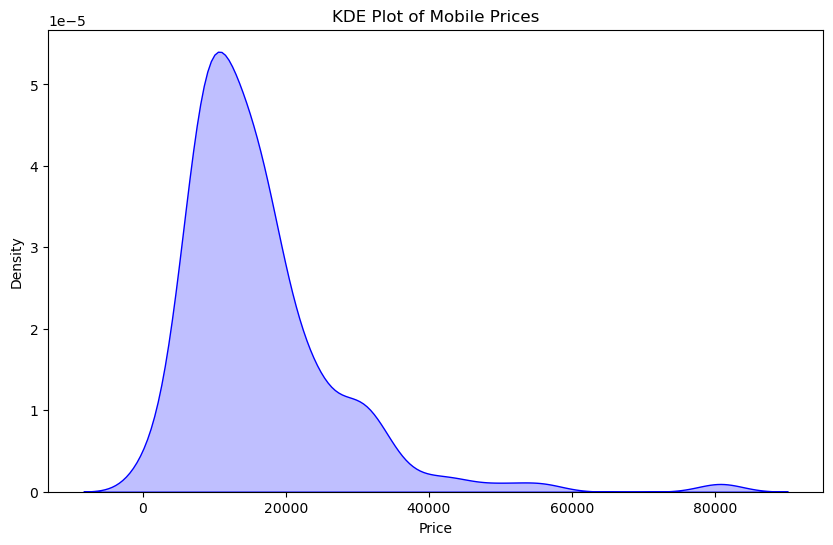

In [19]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Price'], shade=True, color='blue')
plt.title('KDE Plot of Mobile Prices')
plt.xlabel('Price')
plt.ylabel('Density')
plt.show()

## MOST OF THE PHONES ARE SOLD UNDER THE PRICE RANGE OF (10,000 - 35,000)

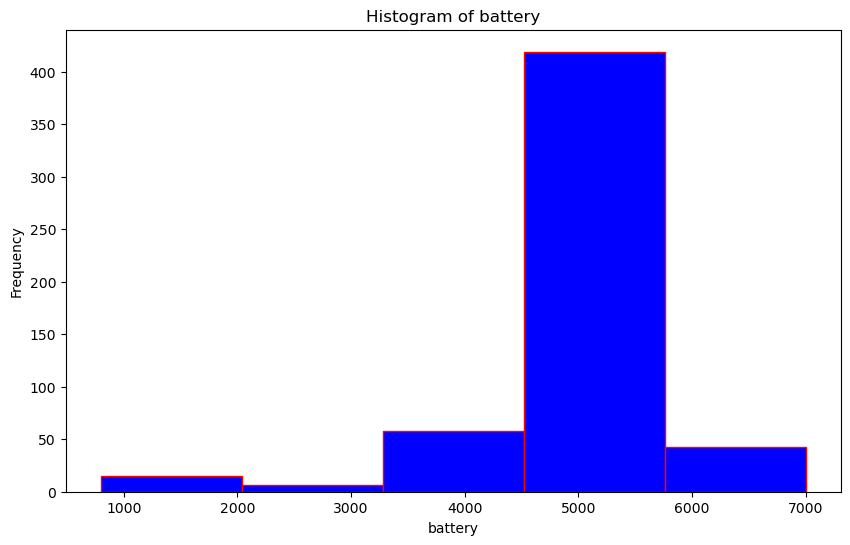

In [21]:
plt.figure(figsize=(10, 6))
plt.hist(df['Battery'], bins=5, color='blue', edgecolor='red')
plt.title('Histogram of battery')
plt.xlabel('battery')
plt.ylabel('Frequency')
plt.show()

## ALMOST 400 PHONES ARE EQUIPPED WITH 5000 MAH BATTERY

In [23]:
no_mobile=df.Model.value_counts().values
no_mobile

array([9, 9, 9, 9, 8, 8, 8, 8, 8, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

## Top Fifteen cell phone brand as market share

([<matplotlib.patches.Wedge at 0x1c7dfc85bb0>,
 [Text(-0.8805953678222179, -0.6592054294148773, 'vivo Y16'),
  Text(0.3844105844004736, -1.0306447024076175, 'realme C55'),
  Text(1.097197327741093, 0.07847307817210346, 'SAMSUNG Galaxy A14 5G'),
  Text(0.23382185052875645, 1.0748615456026456, 'REDMI Note 12 Pro 5G'),
  Text(-0.9253788759906093, 0.5947049149539263, 'vivo T1 44W')],
 [Text(-0.4803247460848461, -0.3595665978626603, '20.5%'),
  Text(0.2096785005820765, -0.5621698376768822, '20.5%'),
  Text(0.5984712696769596, 0.042803497184783705, '20.5%'),
  Text(0.1275391911975035, 0.5862881157832611, '20.5%'),
  Text(-0.504752114176696, 0.324384499065778, '18.2%')])

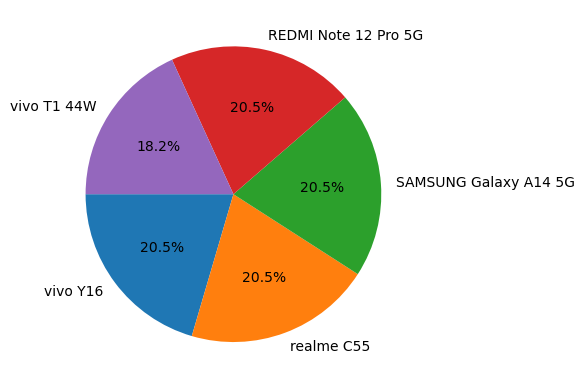

In [25]:
plt.pie(no_mobile[:5],labels=model_name[:5],autopct='%1.1f%%', startangle=180)

## Iphone 11,12 has maximum RAM where as vivo Y35 & Y56 5G has maximum battery and memory 

In [27]:
group=df.groupby(["Model","RAM","Battery","Memory"]).size().reset_index().rename(columns={0:"count"})
group

,Model,RAM,Battery,Memory,count
0,APPLE iPhone 11,8,3110,64,1
1,APPLE iPhone 12,8,2815,64,1
2,APPLE iPhone 14 Plus,3,4323,128,1
3,APPLE iPhone 14 Plus,4,4323,128,1
4,APPLE iPhone 14 Plus,6,4323,128,1
...,...,...,...,...,...
278,vivo Y35,8,5000,128,2
279,vivo Y56 5G,4,5000,128,2
280,vivo Y56 5G,8,5000,128,2
281,vivo Y565G,8,5000,128,1


C:\Users\kulde\AppData\Local\Temp\ipykernel_1668\756793870.py:4: UserWarning: 
The palette list has fewer values (4) than needed (5) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x="RAM", y="Battery",hue="count",palette=["orange", "red", "black", "yellow"],data=group)


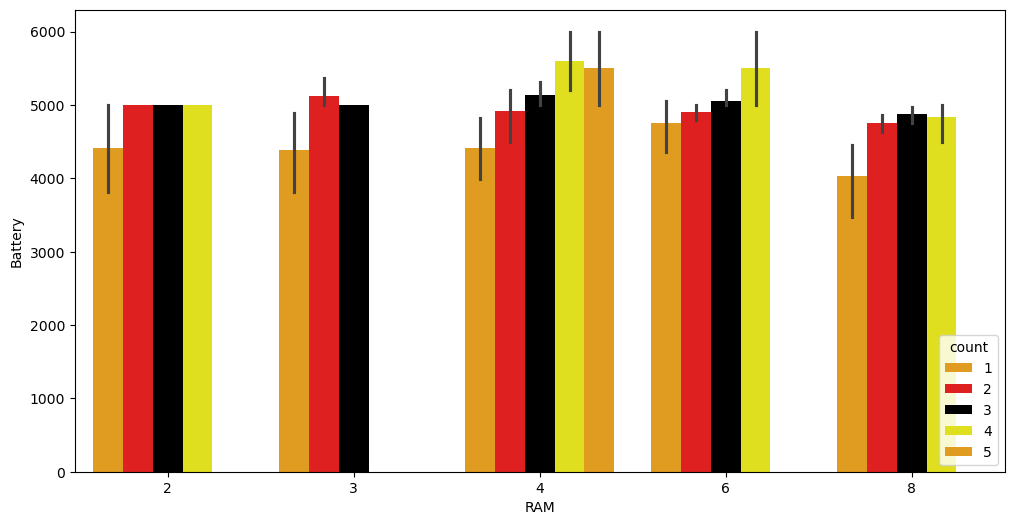

<Figure size 2000x1200 with 0 Axes>

In [28]:
# visualisation plot 
# 4GB RAM mobile phone has the large battery 
plt.rcParams["figure.figsize"]=(12,6)
sns.barplot(x="RAM", y="Battery",hue="count",palette=["orange", "red", "black", "yellow"],data=group)

plt.figure(figsize=(20,12))
plt.show()
import warnings
warnings.filterwarnings("ignore")

<Axes: xlabel='Model', ylabel='count'>

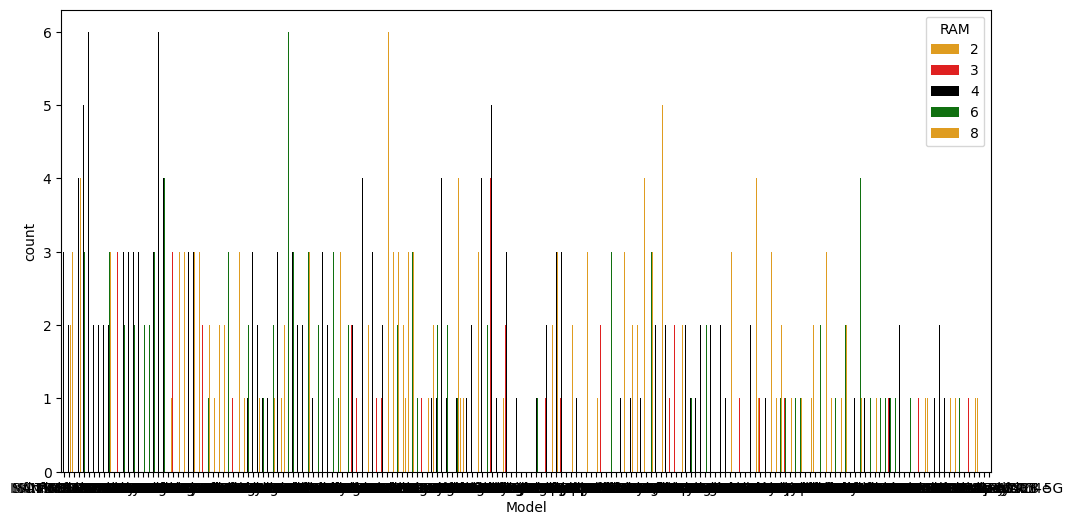

In [29]:
sns.countplot(x="Model",hue="RAM",data=df, palette=["orange", "red", "black", "green"])

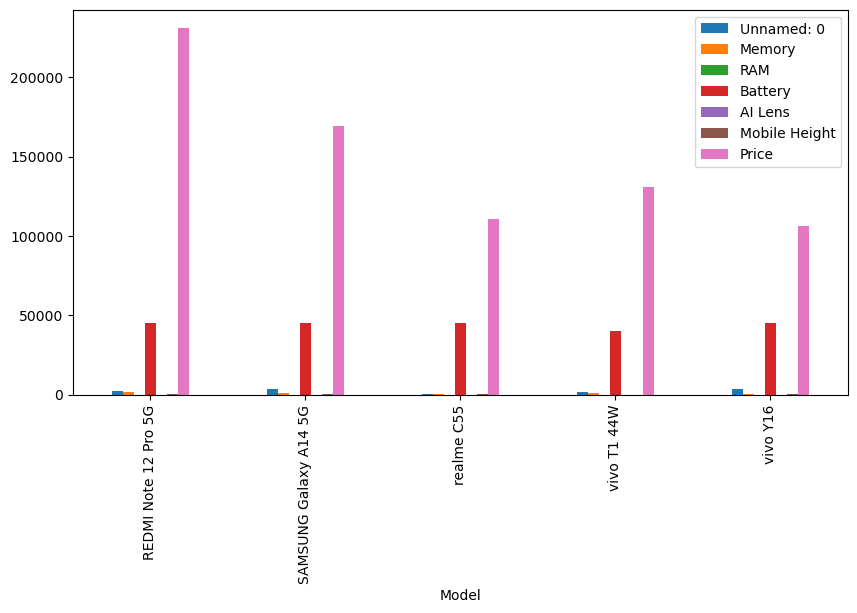

In [30]:
top_n = 5
top_categories = df['Model'].value_counts().nlargest(top_n).index
df_filtered = df[df['Model'].isin(top_categories)]
df_filtered.groupby('Model').sum().plot(kind='bar', figsize=(10, 5))

plt.show()


In [31]:
# Observations
# this bar chart shows redmi note 12 pro 5G , samsung galaxy A14,vivo Y16,realme C55 
# and vivo T1 44W comes with almost same price but out of them redmi note 12 pro 5G has maximum battery
 

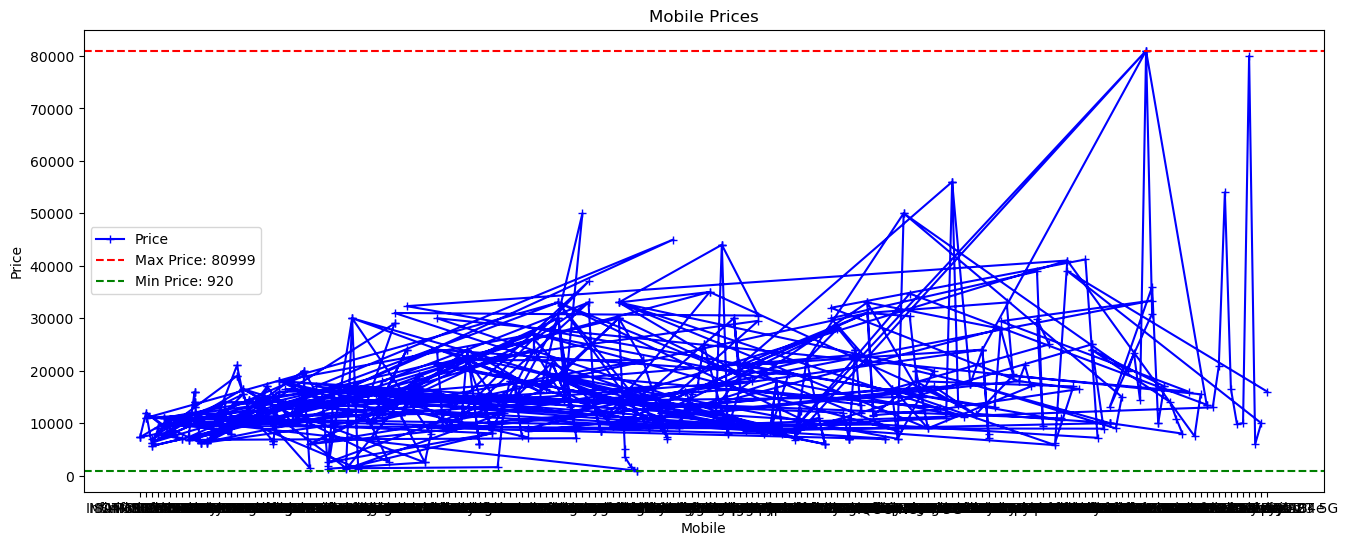

In [32]:
max_price = df['Price'].max()
min_price = df['Price'].min()

plt.figure(figsize=(16, 6))

# Assigning a valid color for the 'color' parameter
plt.plot(df['Model'], df['Price'], marker='+', linestyle='-', color='b', label='Price')
plt.axhline(y=max_price, color='r', linestyle='--', label=f'Max Price: {max_price}')
plt.axhline(y=min_price, color='g', linestyle='--', label=f'Min Price: {min_price}')

plt.xlabel('Mobile')
plt.ylabel('Price')
plt.title('Mobile Prices')
plt.legend()
plt.show()


In [33]:
df = pd.DataFrame(df)

def check_ai_lens(df):
    ai_lens_phones = df[df['Model'].str.contains('AI Lens', case=False)]
    if not ai_lens_phones.empty:
        print("The following phones have AI lens features:")
        for index, row in ai_lens_phones.iterrows():
            print(f"- {row['phone_model']}")
    else:
        print("No phones with AI lens features found.")

# Example usage
check_ai_lens(df)

No phones with AI lens features found.


In [34]:
# drop duplicate if any
df.drop_duplicates()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


##  lets find out the correlation among numeric data 

In [36]:
# Create  the DataFrame
df = pd.DataFrame(df)

# Select only numeric columns from the data 
numeric_df = df.select_dtypes(include=[float, int])

# Calculate the correlation matrix
correlation = numeric_df.corr()
print(correlation)

               Unnamed: 0    Memory       RAM   Battery   AI Lens  \
Unnamed: 0       1.000000  0.120579  0.084103 -0.057136 -0.160373   
Memory           0.120579  1.000000  0.625284 -0.053210 -0.094442   
RAM              0.084103  0.625284  1.000000 -0.104923 -0.082622   
Battery         -0.057136 -0.053210 -0.104923  1.000000  0.150156   
AI Lens         -0.160373 -0.094442 -0.082622  0.150156  1.000000   
Mobile Height    0.015372  0.063163  0.092951  0.695641  0.052018   
Price            0.333940  0.566660  0.532024 -0.034297 -0.153691   

               Mobile Height     Price  
Unnamed: 0          0.015372  0.333940  
Memory              0.063163  0.566660  
RAM                 0.092951  0.532024  
Battery             0.695641 -0.034297  
AI Lens             0.052018 -0.153691  
Mobile Height       1.000000  0.176009  
Price               0.176009  1.000000  


### visualisation of correlaion matrix via heatmap

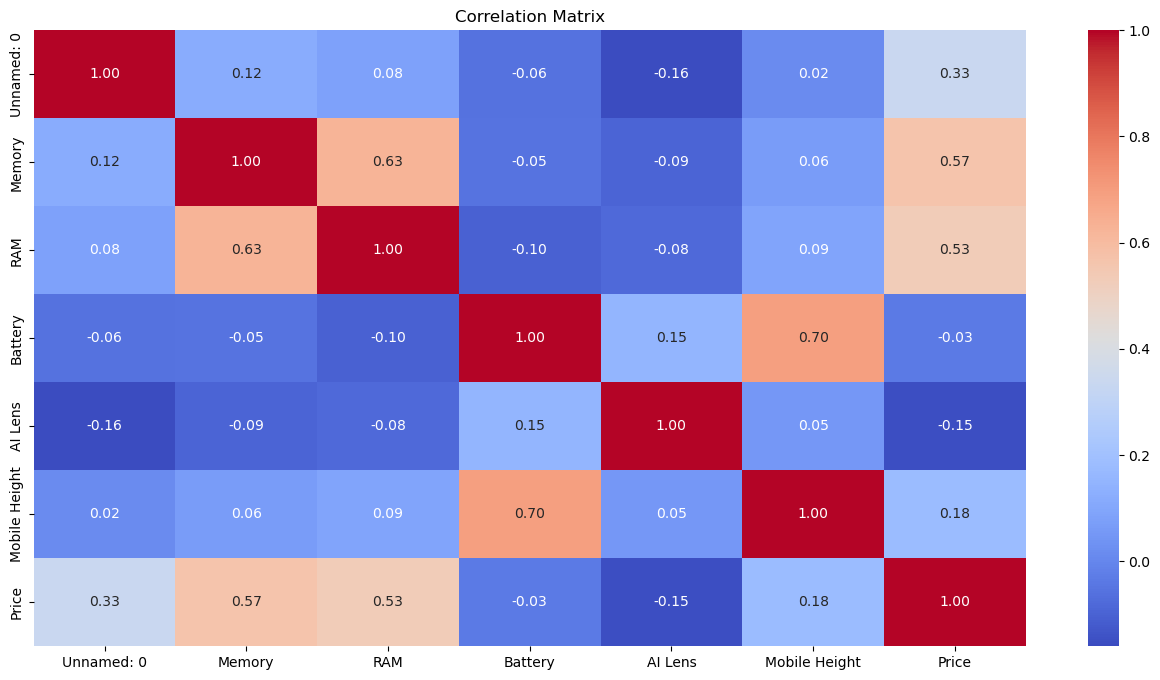

In [38]:
correlation = numeric_df.corr()
plt.figure(figsize=(16,8))
# Plot the heatmap
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f',linecolor='white')
plt.title('Correlation Matrix')
plt.show()

# Step 2
### Outlier detection and cleaning of data 

In [40]:
# No null value or missing value in the data  

df.isnull().any()

Unnamed: 0       False
Model            False
Colour           False
Memory           False
RAM              False
Battery          False
Rear Camera      False
Front Camera     False
AI Lens          False
Mobile Height    False
Processor        False
Price            False
dtype: bool

In [41]:
df.dtypes[df.dtypes!="object"]

Unnamed: 0         int64
Memory             int64
RAM                int64
Battery            int64
AI Lens            int64
Mobile Height    float64
Price              int64
dtype: object

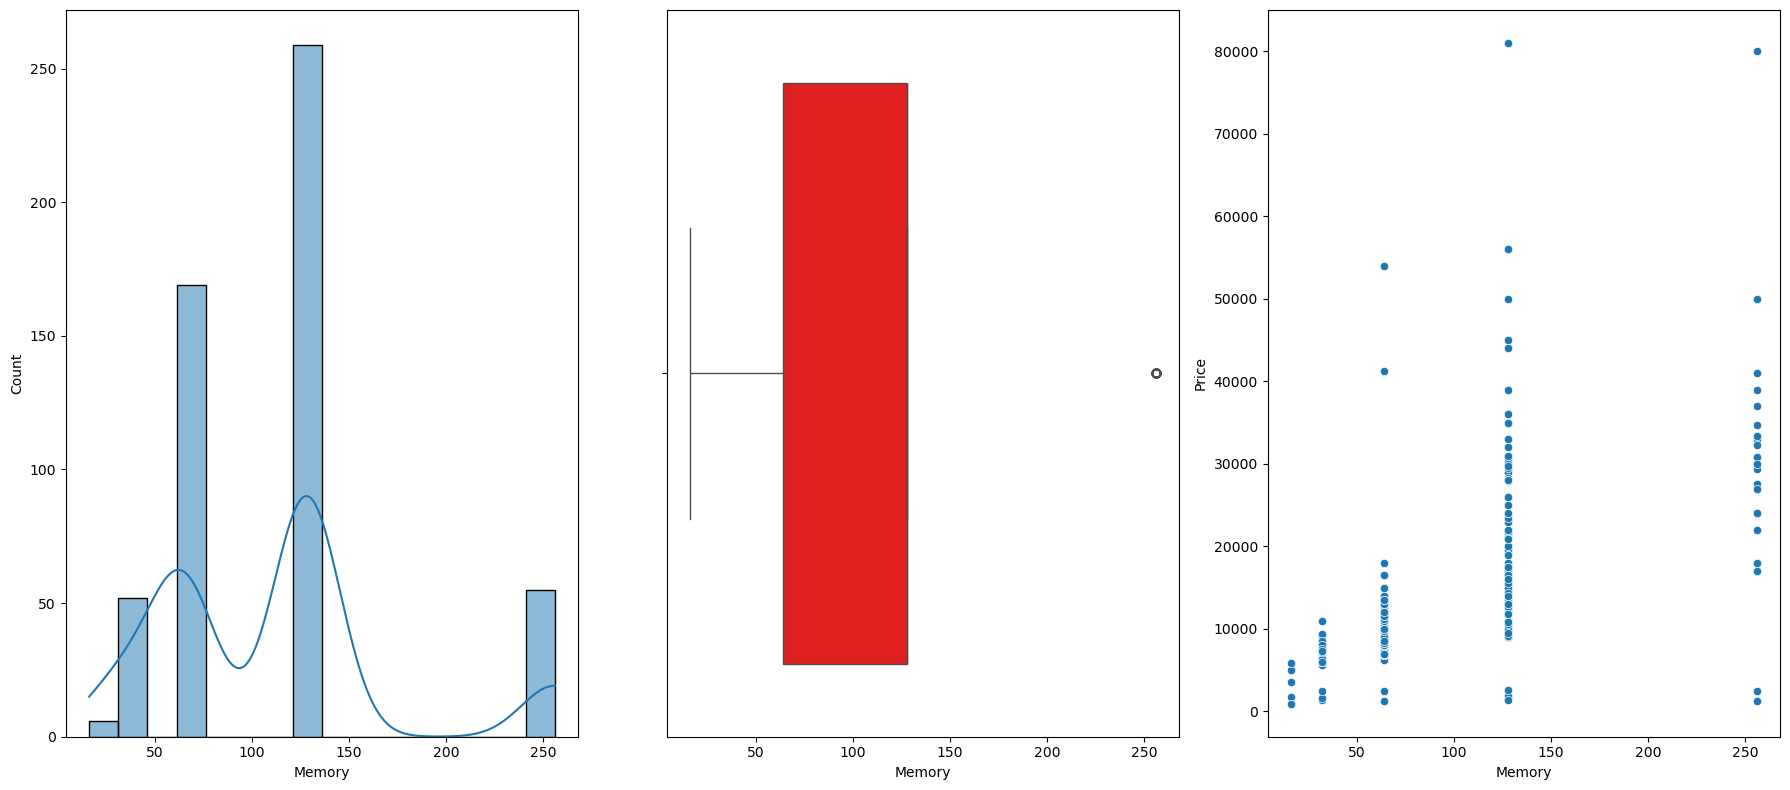

In [42]:
# visualisation of outlier through box plot and distplot
if 'Price' in df.columns and 'Memory' in df.columns:
    fig, axs = plt.subplots(1, 3, figsize=(18, 8))

    # Histogram plot
    sns.histplot(df["Memory"], kde=True, ax=axs[0])

    # Box plot
    sns.boxplot(x="Memory", data=df, color='red', ax=axs[1])

    # Scatter plot
    sns.scatterplot(x="Memory", y="Price", data=df, ax=axs[2])

    plt.tight_layout()
    plt.show()
else:
    print("Column 'Price' or 'Memory' not found in the DataFrame.")


In [43]:
df.query("Memory==250")

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price


In [44]:
# column memory has one outlier it can be seen through box plot & scatter plot 
# it can be correct using IQR method nd do caping over it 

In [46]:
Q1=df["Memory"].quantile(.25)
Q3=df["Memory"].quantile(.75)
IQR=Q3-Q1
print("IQR",IQR)
upper_val=Q3+1.5*IQR
lower_val=Q1-1.5*IQR
print("upper value",upper_val, "lower value",lower_val)


IQR 64.0
upper value 224.0 lower value -32.0


In [47]:
df[df["Memory"]>upper_val]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
117,117,MOTOROLA Edge 40,Eclipse Black,256,8,4400,50MP,32MP,0,16.64,Dimensity 8020,29999
118,118,micromax 1,Eclipse Black,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
127,127,POCO X5 5G,Jaguar Black,256,8,5000,48MP,13MP,0,16.94,Qualcomm Snapdragon 695,17999
154,154,MOTOROLA Edge 40,Nebula Green,256,8,4400,50MP,32MP,0,16.64,Dimensity 8020,29999
155,155,micromax 2,Nebula Green,256,8,800,0MP,0MP,0,4.50,SC6531E,1299
156,156,micromax 3,Nebula Green,256,4,1020,2MP,0MP,0,6.10,MediaTek,2499
159,159,REDMI K50i 5G,Stealth Black,256,8,5080,64MP,16MP,0,16.76,Dimensity 8100,23999
166,166,POCO X5 Pro 5G,Horizon Blue,256,8,5000,108MP,16MP,0,16.94,Qualcomm Snapdragon 778G,23999
175,175,POCO X5 Pro 5G,Astral Black,256,8,5000,108MP,16MP,0,16.94,Qualcomm Snapdragon 778G,23999
200,200,POCO X5 5G,Wildcat Blue,256,8,5000,48MP,13MP,0,16.94,Qualcomm Snapdragon 695,17999


In [48]:
df[df["Memory"]<upper_val]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
535,636,SAMSUNG Galaxy A04e,Light Blue,64,3,5000,13MP,5MP,0,16.51,Mediatek Helio P35,9999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [49]:
df["Memory"]=np.where(df["Memory"]>upper_val,upper_val,np.where(df["Memory"]<lower_val,lower_val,df["Memory"]))

<Axes: xlabel='Memory'>

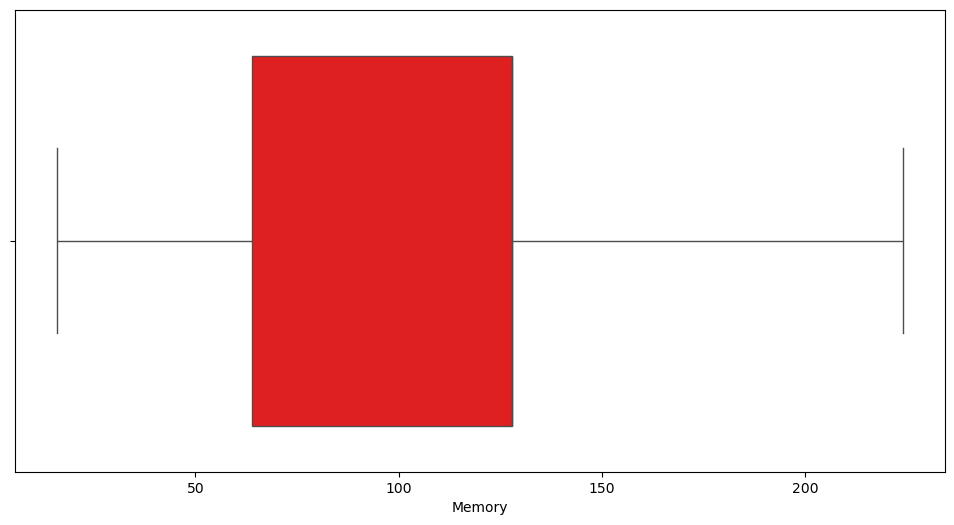

In [50]:
sns.boxplot(x="Memory",color='red',data=df)

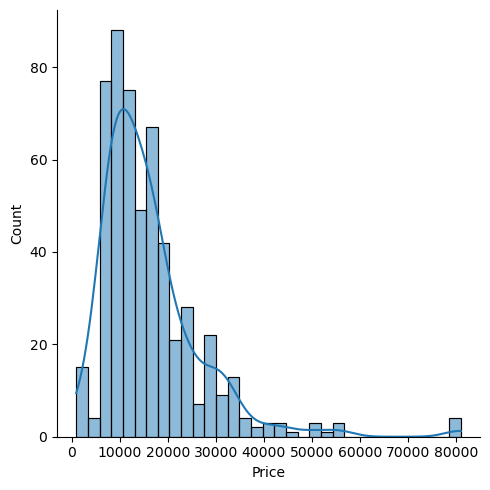

In [51]:
sns.displot(df['Price'], kde=True)

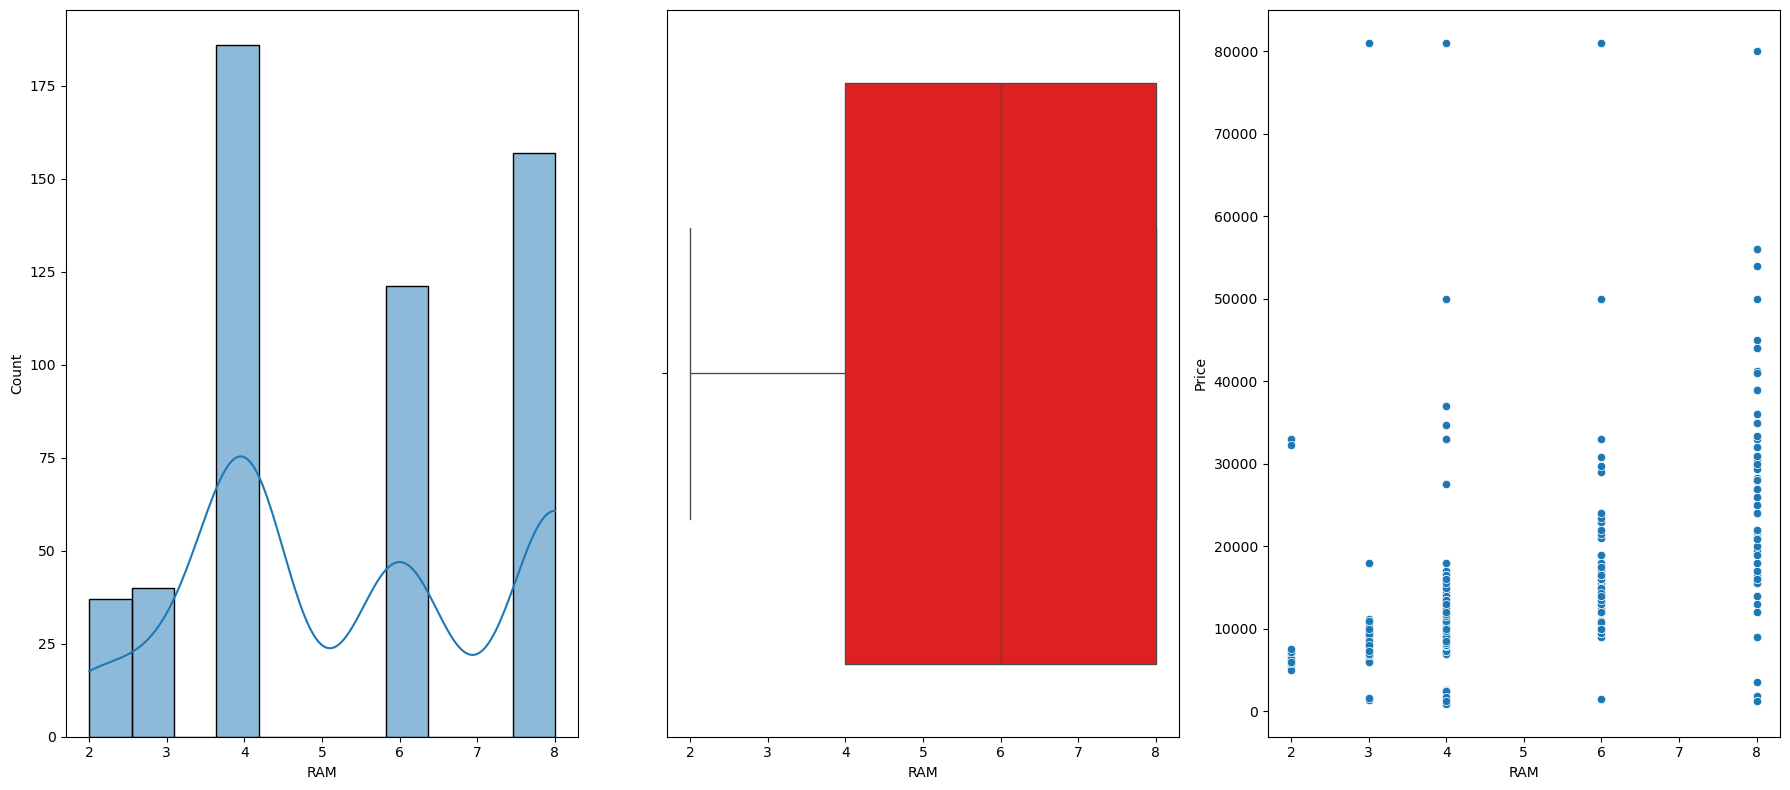

In [52]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

sns.histplot(df["RAM"], kde=True, ax=axs[0])
sns.boxplot(x="RAM", color="red", data=df, ax=axs[1])
sns.scatterplot(x="RAM", y="Price", data=df, ax=axs[2])

plt.tight_layout()
plt.show()

In [53]:
# no outlier has been found on memory column it is evident through box plot 

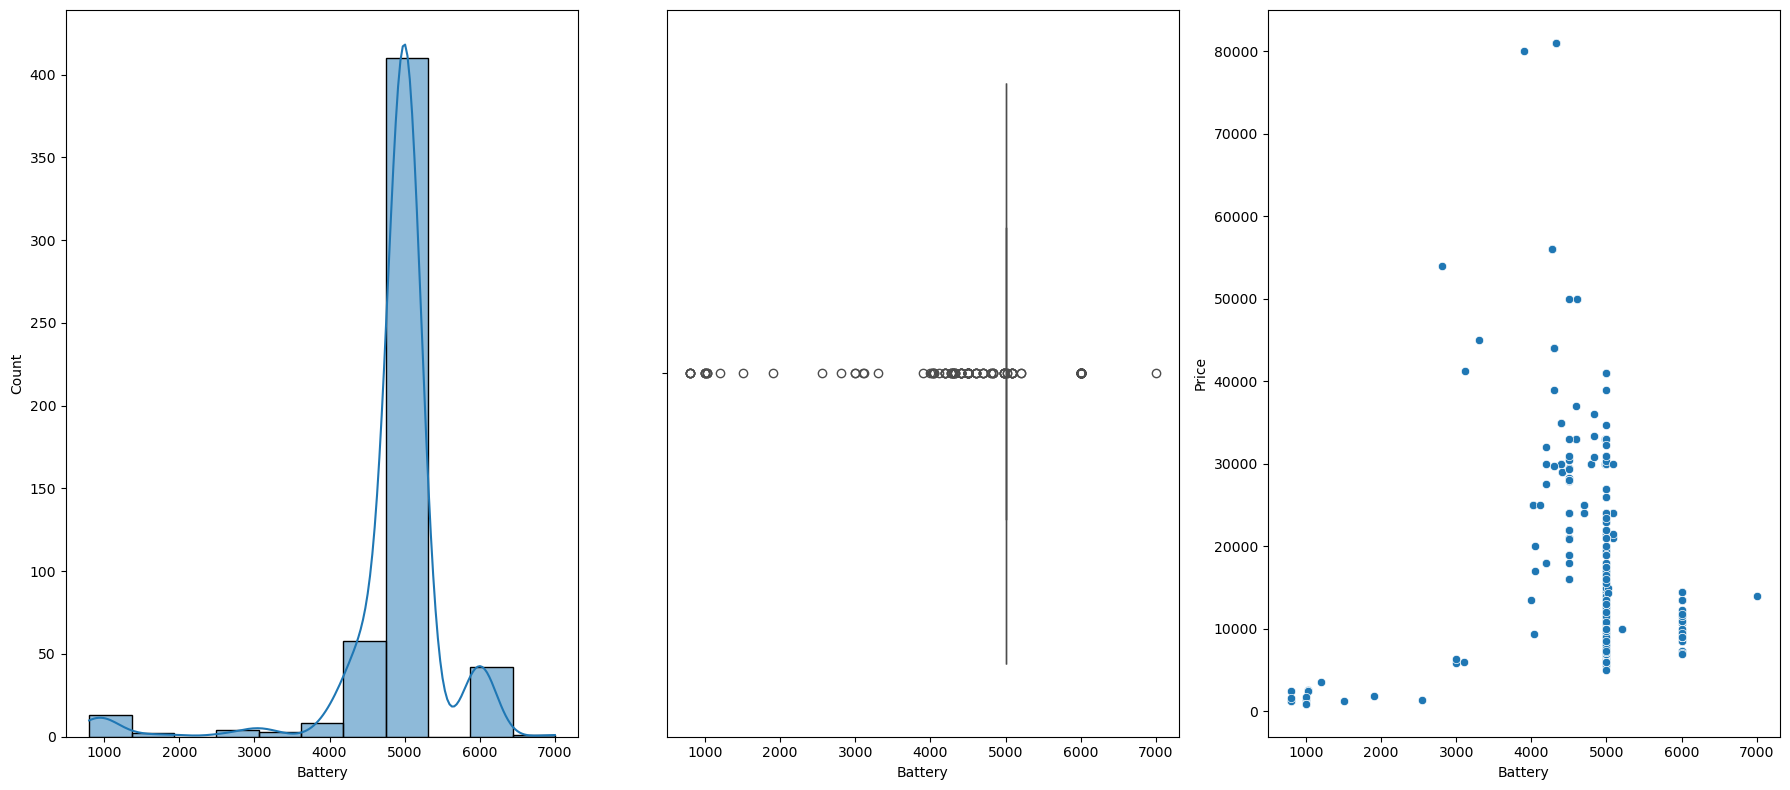

In [54]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))

# Plotting
sns.histplot(df["Battery"], kde=True, ax=axs[0])
sns.boxplot(x="Battery", data=df, color="red", ax=axs[1])
sns.scatterplot(x="Battery", y="Price", data=df, markers=True,ax=axs[2])

# Adjust layout
plt.tight_layout()
plt.show()

In [55]:
Q1=df["Battery"].quantile(.25)
Q3=df["Battery"].quantile(.75)
IQR=Q3-Q1
print("IQR",IQR)
upper_val=Q3+1.5*IQR
lower_val=Q1-1.5*IQR
print("upper value",upper_val, "lower value",lower_val)


IQR 0.0
upper value 5000.0 lower value 5000.0


In [56]:
df.query("Battery==7000" )

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
502,587,Tecno Pova 3,Eco Black,128.0,6,7000,50MP,8MP,0,17.53,MediaTek Helio G88,13999


In [57]:
df = df.drop(index=502)


df.reset_index(drop=True, inplace=True)

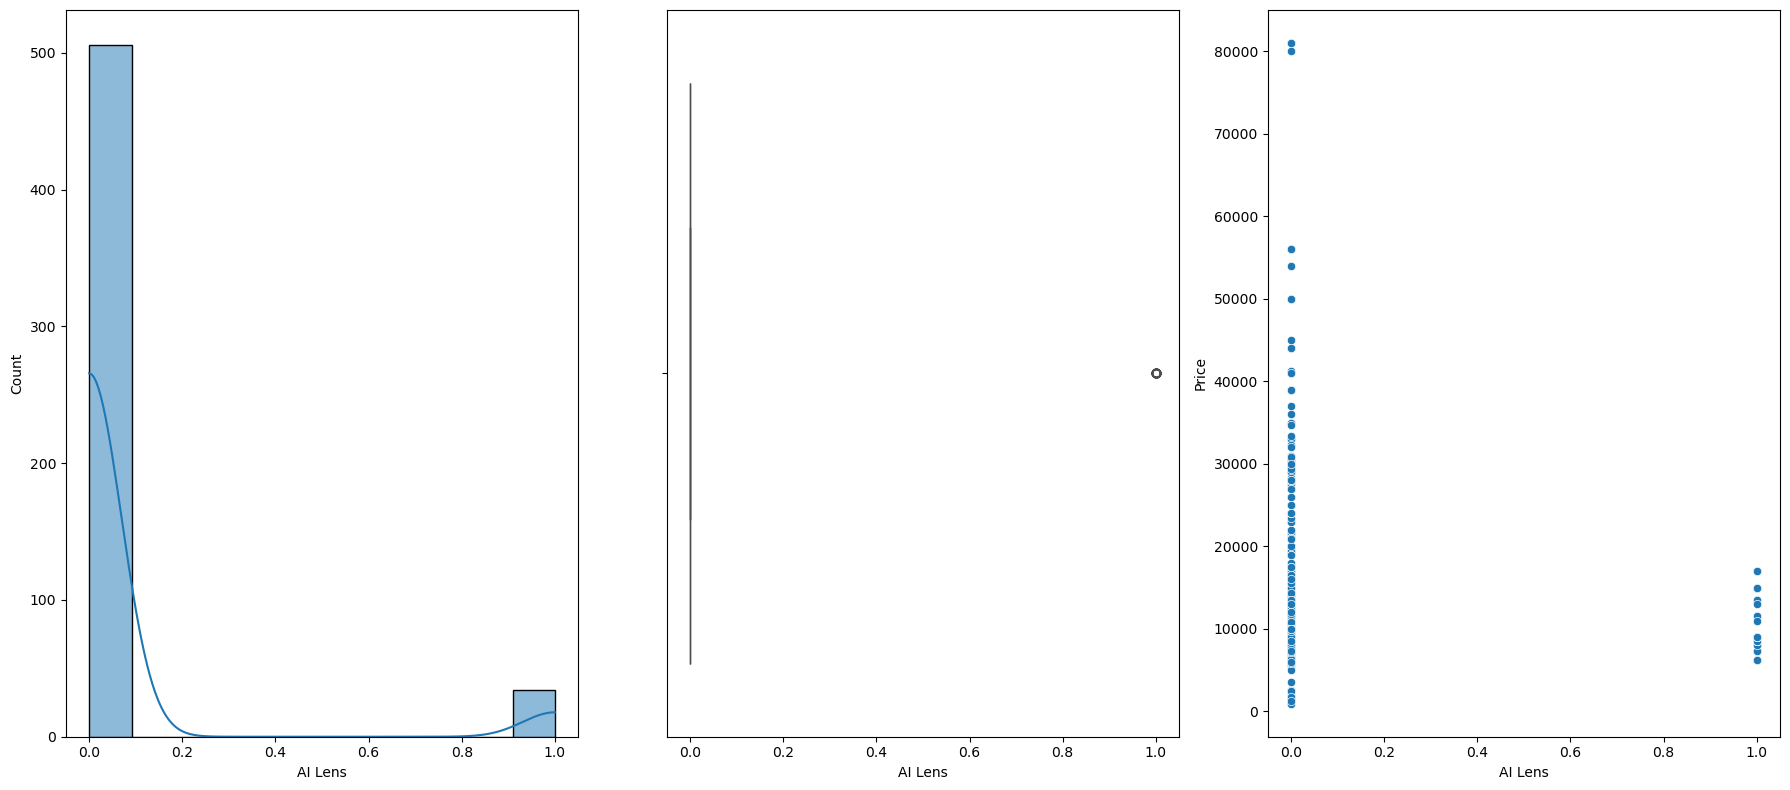

In [58]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sns.histplot(df["AI Lens"], kde=True, ax=axs[0])
sns.boxplot(x="AI Lens", color="red", data=df, ax=axs[1])
sns.scatterplot(x="AI Lens", y="Price", data=df, ax=axs[2])
plt.tight_layout()
plt.show()


In [59]:
df.query("`AI Lens` >=1")


,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,0,Infinix SMART 7,Night Black,64.0,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64.0,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
4,4,Infinix HOT 30i,Marigold,128.0,8,5000,50MP,5MP,1,16.76,G37,8999
5,5,Infinix HOT 30i,Glacier Blue,128.0,8,5000,50MP,5MP,1,16.76,G37,8999
6,6,Infinix HOT 30i,Mirror Black,128.0,8,5000,50MP,5MP,1,16.76,G37,8999
7,7,Infinix HOT 30i,Diamond White,128.0,8,5000,50MP,5MP,1,16.76,G37,8999
8,8,Infinix HOT 30i,Diamond White,64.0,4,5000,50MP,5MP,1,16.76,G37,7999
9,9,Infinix HOT 30i,Mirror Black,64.0,4,5000,50MP,5MP,1,16.76,G37,7999
11,11,Infinix HOT 30i,Glacier Blue,64.0,4,5000,50MP,5MP,1,16.76,G37,7999
12,12,Infinix SMART 7,Emerald Green,64.0,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299


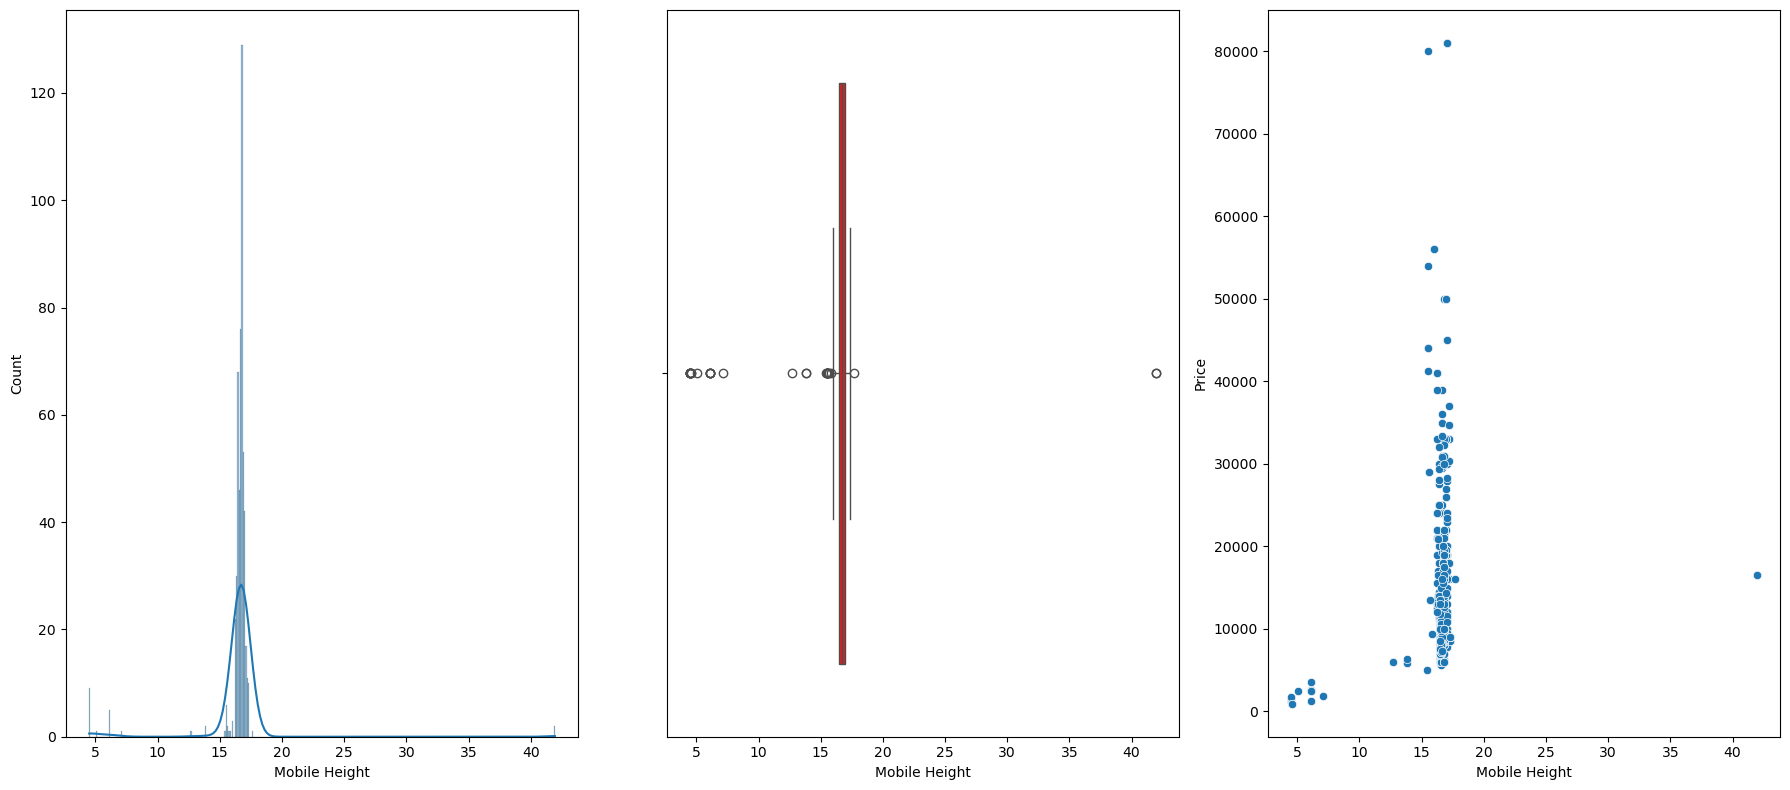

In [60]:
fig, axs = plt.subplots(1, 3, figsize=(18, 8))
sns.histplot(df["Mobile Height"], kde=True, ax=axs[0])
sns.boxplot(x="Mobile Height", color="red", data=df, ax=axs[1])
sns.scatterplot(x="Mobile Height", y="Price", data=df, ax=axs[2])
plt.tight_layout()
plt.show()


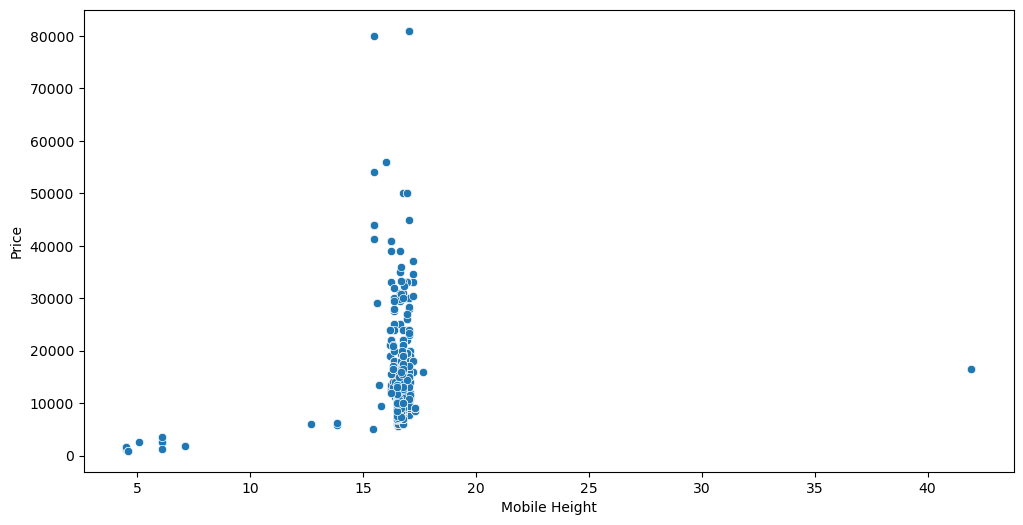

In [61]:
sns.scatterplot(x="Mobile Height", y="Price", data=df)
plt.show()

In [62]:
df.query("`Mobile Height` > 40")


,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
75,75,MOTOROLA G62 5G,Midnight Gray,128.0,8,5000,50MP,16MP,0,41.94,Qualcomm Snapdragon 695 5G,16499
88,88,MOTOROLA G62 5G,Frosted Blue,128.0,8,5000,50MP,16MP,0,41.94,Qualcomm Snapdragon 695 5G,16499


In [63]:
Q1=df["Mobile Height"].quantile(.25)
Q3=df["Mobile Height"].quantile(.75)
IQR=Q3-Q1
print("IQR",IQR)
upper_val=Q3+1.5*IQR
lower_val=Q1-1.5*IQR
print("upper value",upper_val, "lower value",lower_val)


IQR 0.4299999999999997
upper value 17.585 lower value 15.865000000000002


In [64]:
df[df["Mobile Height"]>upper_val]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
75,75,MOTOROLA G62 5G,Midnight Gray,128.0,8,5000,50MP,16MP,0,41.94,Qualcomm Snapdragon 695 5G,16499
88,88,MOTOROLA G62 5G,Frosted Blue,128.0,8,5000,50MP,16MP,0,41.94,Qualcomm Snapdragon 695 5G,16499
510,597,Infinix Note 11s Free Fire Edition,Mithril Grey,128.0,8,5000,50MP,16MP,0,17.65,MediaTek Helio G96,15999


In [65]:
df[df["Mobile Height"]<lower_val]

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
98,98,Micromax IN 2C,Nebula Blue,128.0,6,800,0MP,0MP,0,4.50,SC6531E,1449
108,108,micromax 2,Blade Silver,128.0,8,1900,2MP,0MP,0,7.11,SC6531E,1849
116,116,micromax,OMG Black,128.0,4,1000,0MP,0MP,0,4.50,SC6531E,1422
118,118,micromax 1,Eclipse Black,224.0,8,800,0MP,0MP,0,4.50,SC6531E,1299
133,133,Micromax 3,OMG Black,128.0,4,1020,2MP,0MP,0,6.10,MediaTek,2615
135,135,Google Pixel 6a,Chalk,128.0,6,4410,12MP,8MP,0,15.60,Google Tensor,28999
136,136,Google Pixel 6a,Charcoal,128.0,6,4410,12MP,8MP,0,15.60,Google Tensor,28999
152,152,micromax 3,Racing Black,64.0,4,800,2MP,0MP,0,5.08,0 0 0 208MHz,2490
155,155,micromax 2,Nebula Green,224.0,8,800,0MP,0MP,0,4.50,SC6531E,1299
156,156,micromax 3,Nebula Green,224.0,4,1020,2MP,0MP,0,6.10,MediaTek,2499


In [66]:
df["Mobile Height"]=np.where(df["Mobile Height"]>
                             upper_val,upper_val,np.where(df["Mobile Height"]<lower_val,lower_val,
                                                                              df["Mobile Height"]))

In [67]:
df.query("`Mobile Height` >= 80000")

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price


In [68]:
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor,Price
0,0,Infinix SMART 7,Night Black,64.0,4,6000,13MP,5MP,1,16.760,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64.0,4,6000,13MP,5MP,1,16.760,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128.0,8,5000,50MP,16MP,0,16.640,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32.0,2,5000,8MP,5MP,0,16.560,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128.0,8,5000,50MP,5MP,1,16.760,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
535,637,SAMSUNG Galaxy S23 5G,Cream,224.0,8,3900,50MP,12MP,0,15.865,Qualcomm Snapdragon 8 Gen 2,79999
536,638,LAVA Z21,Cyan,32.0,2,3100,5MP,2MP,0,15.865,Octa Core,5998
537,639,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000,50MP,8MP,0,16.760,MediaTek Helio G35,9990
538,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000,50MP,32MP,0,16.260,"Exynos 1380, Octa Core",38999


<Axes: xlabel='Price', ylabel='Density'>

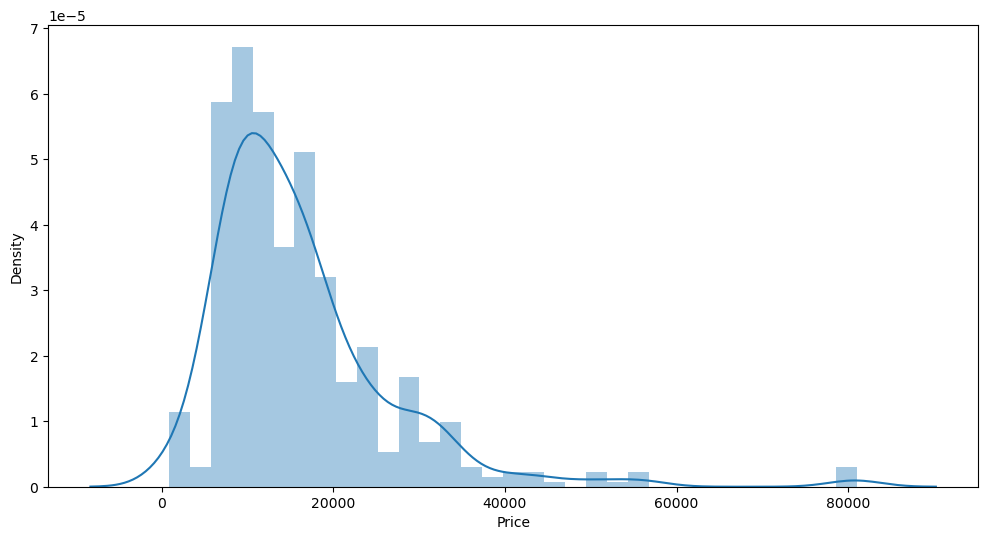

In [69]:
sns.distplot(df["Price"])

In [70]:
log=df["Price"] = np.log1p(df["Price"])

<Axes: xlabel='Price', ylabel='Density'>

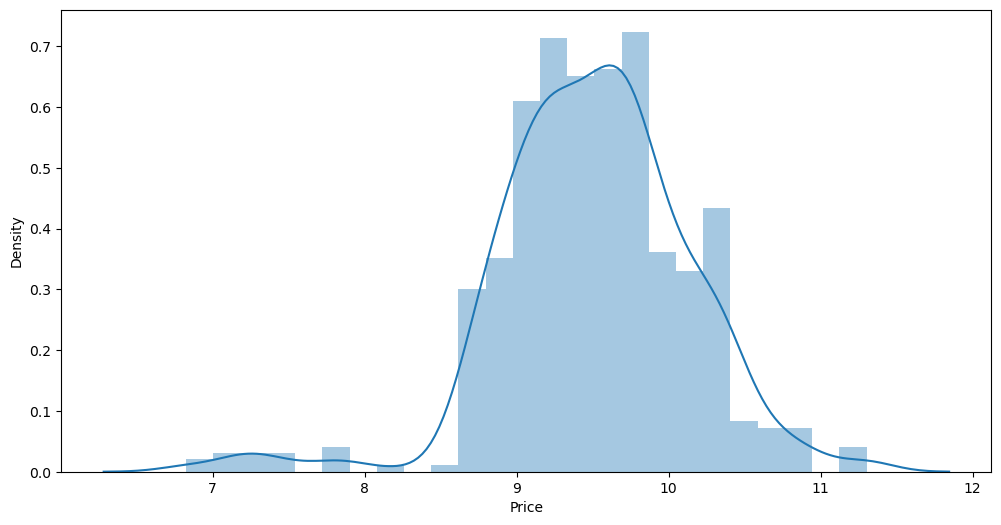

In [71]:
sns.distplot(df["Price"])


## Split dataset into training and testing sets for machine learning

In [73]:
X = df.drop('Price', axis=1)
y = df['Price']

In [74]:
X

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor
0,0,Infinix SMART 7,Night Black,64.0,4,6000,13MP,5MP,1,16.760,Unisoc Spreadtrum SC9863A1
1,1,Infinix SMART 7,Azure Blue,64.0,4,6000,13MP,5MP,1,16.760,Unisoc Spreadtrum SC9863A1
2,2,MOTOROLA G32,Mineral Gray,128.0,8,5000,50MP,16MP,0,16.640,Qualcomm Snapdragon 680
3,3,POCO C50,Royal Blue,32.0,2,5000,8MP,5MP,0,16.560,Mediatek Helio A22
4,4,Infinix HOT 30i,Marigold,128.0,8,5000,50MP,5MP,1,16.760,G37
...,...,...,...,...,...,...,...,...,...,...,...
535,637,SAMSUNG Galaxy S23 5G,Cream,224.0,8,3900,50MP,12MP,0,15.865,Qualcomm Snapdragon 8 Gen 2
536,638,LAVA Z21,Cyan,32.0,2,3100,5MP,2MP,0,15.865,Octa Core
537,639,Tecno Spark 8T,Turquoise Cyan,64.0,4,5000,50MP,8MP,0,16.760,MediaTek Helio G35
538,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128.0,8,5000,50MP,32MP,0,16.260,"Exynos 1380, Octa Core"


In [75]:
y

0       8.895630
1       8.895630
2       9.392662
3       8.639411
4       9.104980
         ...    
535    11.289782
536     8.699348
537     9.209440
538    10.571317
539     9.680344
Name: Price, Length: 540, dtype: float64

In [76]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [77]:
X_train

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor
182,182,micromax1,Light Silver,32.0,3,800,0MP,0MP,0,15.865,SC6531E
244,244,redmi max,M3),16.0,8,1200,2MP,0MP,0,15.865,MT6260A
539,642,OPPO A77,Sky Blue,128.0,4,5000,50MP,8MP,0,16.660,Mediatek Helio G35
390,415,realme 10 Pro+ 5G,Hyperspace,128.0,6,5000,108MP,16MP,0,17.020,Mediatek Dimensity 1080 5G
453,513,Infinix HOT 12 Play,Horizon Blue,64.0,4,6000,13MP,8MP,0,17.320,Unisoc T610
...,...,...,...,...,...,...,...,...,...,...,...
71,71,realme C30,Denim Black,32.0,3,5000,8MP,5MP,0,16.510,Unisoc T612
106,106,POCO C50,Country Green,32.0,3,5000,8MP,5MP,0,16.560,Mediatek Helio A22
270,273,Infinix Hot 12,7Â° Purple,64.0,4,6000,50MP,8MP,1,17.320,Meditek Helio G37
435,482,Redmi 9A Sport,Coral Green,32.0,2,5000,13MP,5MP,0,16.590,Helio G25


In [78]:
X_test

,Unnamed: 0,Model,Colour,Memory,RAM,Battery,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor
229,229,Infinix HOT 20 Play,Luna Blue,64.0,4,6000,13MP,8MP,1,17.32,MediaTek G37
73,73,REDMI A1+,Light Blue,32.0,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22
521,616,IQOO Neo 7 5G,Frost Blue,224.0,4,5000,64MP,16MP,0,17.22,Dimensity 8200
86,86,realme C55,Rainforest,64.0,4,5000,64MP,8MP,0,17.07,Helio G88
469,535,realme Narzo N55,Prime Black,64.0,4,5000,64MP,8MP,0,17.07,MediaTek Helio G88
...,...,...,...,...,...,...,...,...,...,...,...
498,582,Infinix Hot 11,Silver Wave,64.0,4,5200,13MP,8MP,0,16.76,MediaTek Helio G70
148,148,Infinix NOTE 12i,Force Black,64.0,4,5000,50MP,8MP,0,17.02,Mediatek Helio G85
46,46,MOTOROLA e32,Arctic Blue,64.0,4,5000,50MP,8MP,0,16.51,Mediatek Helio G37
93,93,REDMI 11 Prime,Peppy Purple,64.0,4,5000,50MP,8MP,0,16.71,Helio G99


## Applying OneHotencoder for categorical column to convert object into binary codes through columntranformer

In [80]:
# Check column names
print(df.columns)


transformer = ColumnTransformer(
    transformers=[
        ("onehot", OneHotEncoder(sparse_output=False, drop="first", handle_unknown="ignore"), ['Model', 'Colour', 'Rear Camera', 'Front Camera','Processor'])
    ],
    remainder='passthrough'  # Leave other columns unchanged
)

# Fit and transform the training data
X_train_transformed = transformer.fit_transform(X_train)

# Transform the test data
X_test_transformed = transformer.transform(X_test)


Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor',
       'Price'],
      dtype='object')


## Initialize the linear Regression model for numerical target output

In [82]:
model = LinearRegression()

# Fit the model
model.fit(X_train_transformed, y_train)


LinearRegression()

In [83]:
y_pred = model.predict(X_test_transformed)

In [84]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.035107140885729096
R^2 Score: 0.9087215396628474


In [85]:
model.score(X_test_transformed,y_test)

0.9087215396628474

## initializing lasso regression

In [87]:
lasso = Lasso(alpha=0.1) 

In [88]:
lasso.fit(X_train_transformed,y_train)

Lasso(alpha=0.1)

In [89]:
y_pred = lasso.predict(X_test_transformed)

In [90]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.1095
R² Score: 0.7153


## This ML model gives 70% of  accurecy

In [92]:
ran_model = RandomForestRegressor(n_estimators=100, random_state=42)

## initilizing randomforest model to evaluate the data for ML

In [94]:
ran_model.fit(X_train_transformed, y_train)

RandomForestRegressor(random_state=42)

In [95]:
y_pred = ran_model.predict(X_test_transformed)

In [96]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


Mean Squared Error: 0.0212
R² Score: 0.9449


## This model predict 94% of accurecy so we can say that random forest is showing best result so far!  

In [98]:
with open("model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model saved successfully!")

Model saved successfully!


## Model saved it in the pickle file  for future use, my model predecting  90% of accurecy     

In [101]:
with open("model.pkl", 'rb') as file:
    loaded_df = pickle.load(file)

print(loaded_df)

LinearRegression()


## Model loaded

In [121]:
loaded_df

LinearRegression()